<center>
        <h1> Magic-Bricks Noida Properties Web Scrapping Data Analysis Project</h1>
</center>

# Installing and Importing Libraries/Dependencies

In [33]:
# %pip install selenium
# %pip install beautifulsoup4
# %pip install pandas
# %pip install lxml
# %pip install matplotlib seaborn

from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
import time

# Step 1: Define path to chromedriver
chrome_path = r"C:\Users\Nishs\Downloads\chromedriver-win64\chromedriver-win64\chromedriver.exe"

# Step 2: Set up the Chrome driver
service = Service(executable_path=chrome_path)
driver = webdriver.Chrome(service=service)

# Step 3: Open MagicBricks website
driver.get("https://www.magicbricks.com/")
time.sleep(5)  # wait for page to load


# Noida Properties Listings

In [34]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
import time

chrome_path = r"C:\Users\Nishs\Downloads\chromedriver-win64\chromedriver-win64\chromedriver.exe"
service = Service(executable_path=chrome_path)
driver = webdriver.Chrome(service=service)

# 👇 Directly open the search results page for Noida
driver.get("https://www.magicbricks.com/property-for-sale/residential-real-estate?bedroom=2,3&proptype=Multistorey-Apartment,Builder-Floor-Apartment,Penthouse,Studio-Apartment,Residential-House,Villa&cityName=Noida")
time.sleep(5)  # wait for listings to load


## Accessing Full Web page Source

In [35]:
from bs4 import BeautifulSoup

# Get the full page source
html = driver.page_source
soup = BeautifulSoup(html, "lxml") # lxml parser

# Preview HTML to locate listing structure
print(soup.prettify()[:2000]) # print first 2000 characters


<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   2 BHK Flats in Noida: 7718+ 2 BHK Flats for Sale in Noida
  </title>
  <link href="https://fonts.gstatic.com" rel="dns-prefetch"/>
  <link href="https://cdn.staticmb.com" rel="preconnect"/>
  <link href="https://img.staticmb.com" rel="preconnect"/>
  <link href="https://www.googletagmanager.com" rel="dns-prefetch"/>
  <link href="https://www.google-analytics.com" rel="dns-prefetch"/>
  <link href="https://cdn.staticmb.com/images/favicon.ico" rel="shortcut icon"/>
  <meta content="Find over 7718+ of 2 BHK Flats for sale in Noida only on MagicBricks. Buy 2 BHK Apartments / Flats in Noida from ✓ Verified listings ✓ Real photos ✓ Maps &amp; much more." name="description"/>
  <link as="image" fetchpriority="high" href="https://img.staticmb.com/mbimages/project/Photo_h310_w462/2024/02/09/Project-Photo-

In [36]:
# Try to find all property cards
property_cards = soup.find_all("div", class_="m-srp-card")

# Show how many cards were found
print(f"Total properties found: {len(property_cards)}")


Total properties found: 0


In [37]:
# Try generic 'li' based listing
property_cards = soup.find_all("li", class_="mb-srp__list")
print(f"Total properties found: {len(property_cards)}")


Total properties found: 0


In [38]:
# Scroll down to load listings
last_height = driver.execute_script("return document.body.scrollHeight")

for _ in range(3):  # 3 times scroll
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(3)  # wait to load new content
    new_height = driver.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        break
    last_height = new_height


In [39]:
html = driver.page_source
soup = BeautifulSoup(html, "lxml")

# Try finding listings again
property_cards = soup.find_all("li", class_="mb-srp__list")
print(f"Total properties found: {len(property_cards)}")


Total properties found: 0


<center>
        <h4>From above codes we can see that beautiful soup not able get the properties data.
        Now we are using selenium to get the properties data.</h4>
</center>

In [40]:
from selenium.webdriver.common.by import By

# Find all listing cards
property_cards = driver.find_elements(By.CLASS_NAME, "mb-srp__list")

print(f"Total properties found: {len(property_cards)}")

# Example: print first 5 cards basic info
for card in property_cards[:5]:
    try:
        title = card.find_element(By.CLASS_NAME, "mb-srp__card--title").text
        price = card.find_element(By.CLASS_NAME, "mb-srp__card__price").text
        info = card.find_element(By.CLASS_NAME, "mb-srp__card__info").text
        print(f"{title} | {price} | {info}")
    except:
        print("Error in extracting this card")


Total properties found: 30
3 BHK Flat for Sale in Sector 115, Noida | ₹
4.06 Cr
₹17,622 per sqft | 3 BHK Flat for Sale in Sector 115, Noida
Ivory County
SUPER AREA
2304 sqft
UNDER CONSTRUCTION
Poss. by Dec '29
TRANSACTION
New Property
Multistorey Apartment for Sale in Sector 115, Noida. Covered area is 2304.0 Sq-ft. This property belongs to "Ivory County" .Read more
2 BHK Flat for Sale in Noida Extension, Noida | ₹
1.25 Cr
₹9,025 per sqft | 2 BHK Flat for Sale in Noida Extension, Noida
ACE City
SUPER AREA
1385 sqft
TRANSACTION
New Property
FURNISHING
Unfurnished
Multistorey Apartment for Sale in Noida Extension, Noida. Covered area is 1385.0 Sq-ft. This property belongs to "ACE City" .Read more
3 BHK Flat for Sale in Sector 150, Pusta Road, Noida | ₹
2.43 Cr
₹14,300 per sqft | 3 BHK Flat for Sale in Sector 150, Pusta Road, Noida
Prateek Canary
SUPER AREA
1700 sqft
UNDER CONSTRUCTION
Poss. by Oct '27
TRANSACTION
New Property
Multistorey Apartment for Sale in Sector 150, Noida. Covered a

# Imported Pandas for EDA

In [41]:
import pandas as pd

# Create empty list to store all properties
properties = []

for card in property_cards:
    try:
        title = card.find_element(By.CLASS_NAME, "mb-srp__card--title").text.strip()
        price = card.find_element(By.CLASS_NAME, "mb-srp__card__price").text.strip()
        info = card.find_element(By.CLASS_NAME, "mb-srp__card__info").text.strip()
        details = card.text.strip()
        
        properties.append({
            "Title": title,
            "Price": price,
            "Info": info,
            "Full_Details": details
        })
    except:
        continue

# Converting to DataFrame
df = pd.DataFrame(properties)

# Show first 5 rows
df.head()


,Title,Price,Info,Full_Details
0,"3 BHK Flat for Sale in Sector 115, Noida","₹\n4.06 Cr\n₹17,622 per sqft","3 BHK Flat for Sale in Sector 115, Noida\nIvor...",20\n+\nPhotos\nPosted: Yesterday\n3 BHK Flat f...
1,"2 BHK Flat for Sale in Noida Extension, Noida","₹\n1.25 Cr\n₹9,025 per sqft","2 BHK Flat for Sale in Noida Extension, Noida\...","18\n+\nPhotos\nPosted: Jul 21, '25\n2 BHK Flat..."
2,"3 BHK Flat for Sale in Sector 150, Pusta Road,...","₹\n2.43 Cr\n₹14,300 per sqft","3 BHK Flat for Sale in Sector 150, Pusta Road,...",25\n+\nPhotos\nPosted: Yesterday\n3 BHK Flat f...
3,"3 BHK Flat for Sale in Sector 121, Noida","₹\n2.66 Cr\n₹18,393 per sqft","3 BHK Flat for Sale in Sector 121, Noida\nCleo...","90\n+\nPhotos\nPosted: Jul 21, '25\n3 BHK Flat..."
4,"3 BHK Flat for Sale in Noida Extension, Noida","₹\n1.68 Cr\n₹10,500 per sqft",POPULAR PROJECT\n3 BHK Flat for Sale in Noida ...,"50\n+\nPhotos\nPosted: Jul 20, '25\nPOPULAR PR..."


# Data Cleaning - removing symbols like - \n, \₹,\n+

In [42]:
import re

def clean_price(price_text):
    match = re.search(r'₹\s*([\d\.]+)\s*Cr', price_text)
    return float(match.group(1)) if match else None

def clean_area(info_text):
    match = re.search(r'([\d,]+)\s*sqft', info_text)
    return int(match.group(1).replace(',', '')) if match else None

def clean_price_per_sqft(info_text):
    match = re.search(r'₹([\d,]+)\s*per sqft', info_text)
    return int(match.group(1).replace(',', '')) if match else None

def extract_bhk(title):
    match = re.search(r'(\d+)\s*BHK', title)
    return int(match.group(1)) if match else None

def extract_sector(title):
    match = re.search(r'Sector\s*(\d+)', title)
    return int(match.group(1)) if match else None

# Apply cleaning functions
df['Price_Cr'] = df['Price'].apply(clean_price)
df['Area_sqft'] = df['Info'].apply(clean_area)
df['Price_per_sqft'] = df['Info'].apply(clean_price_per_sqft)
df['BHK'] = df['Title'].apply(extract_bhk)
df['Sector'] = df['Title'].apply(extract_sector)

# Drop rows with missing values (optional)
df.dropna(subset=['Price_Cr', 'Area_sqft', 'BHK'], inplace=True)

# Preview cleaned data
df.head()


,Title,Price,Info,Full_Details,Price_Cr,Area_sqft,Price_per_sqft,BHK,Sector
0,"3 BHK Flat for Sale in Sector 115, Noida","₹\n4.06 Cr\n₹17,622 per sqft","3 BHK Flat for Sale in Sector 115, Noida\nIvor...",20\n+\nPhotos\nPosted: Yesterday\n3 BHK Flat f...,4.06,2304,None,3,115.0
1,"2 BHK Flat for Sale in Noida Extension, Noida","₹\n1.25 Cr\n₹9,025 per sqft","2 BHK Flat for Sale in Noida Extension, Noida\...","18\n+\nPhotos\nPosted: Jul 21, '25\n2 BHK Flat...",1.25,1385,None,2,NaN
2,"3 BHK Flat for Sale in Sector 150, Pusta Road,...","₹\n2.43 Cr\n₹14,300 per sqft","3 BHK Flat for Sale in Sector 150, Pusta Road,...",25\n+\nPhotos\nPosted: Yesterday\n3 BHK Flat f...,2.43,1700,None,3,150.0
3,"3 BHK Flat for Sale in Sector 121, Noida","₹\n2.66 Cr\n₹18,393 per sqft","3 BHK Flat for Sale in Sector 121, Noida\nCleo...","90\n+\nPhotos\nPosted: Jul 21, '25\n3 BHK Flat...",2.66,1450,None,3,121.0
4,"3 BHK Flat for Sale in Noida Extension, Noida","₹\n1.68 Cr\n₹10,500 per sqft",POPULAR PROJECT\n3 BHK Flat for Sale in Noida ...,"50\n+\nPhotos\nPosted: Jul 20, '25\nPOPULAR PR...",1.68,967,None,3,NaN


# Imported Matplotlib, Seaborn for data visualization

C:\Users\Nishs\AppData\Local\Temp\ipykernel_12112\461106725.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='BHK', y='Price_Cr', estimator='mean', palette='viridis')


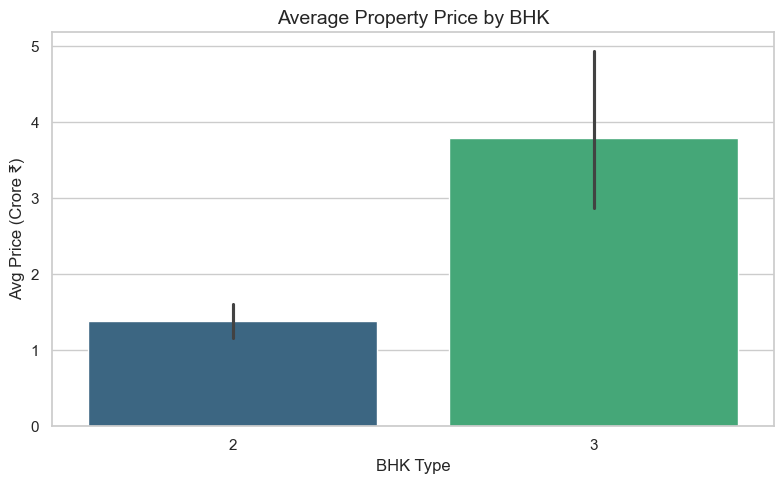

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set theme
sns.set(style="whitegrid")

# Group and plot
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='BHK', y='Price_Cr', estimator='mean', palette='viridis')

plt.title('Average Property Price by BHK', fontsize=14)
plt.ylabel('Avg Price (Crore ₹)')
plt.xlabel('BHK Type')
plt.tight_layout()
plt.show()


C:\Users\Nishs\AppData\Local\Temp\ipykernel_12112\270498600.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sector_df, x='Sector', y='Price_Cr', estimator='mean', palette='magma')


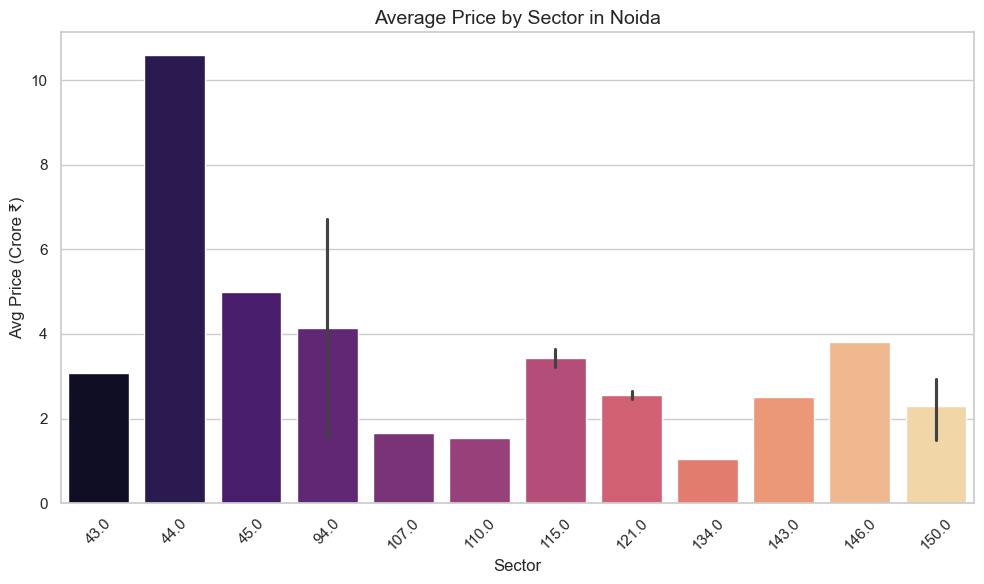

In [44]:
# Drop NaN sectors for analysis
sector_df = df.dropna(subset=['Sector'])

plt.figure(figsize=(10, 6))
sns.barplot(data=sector_df, x='Sector', y='Price_Cr', estimator='mean', palette='magma')

plt.title('Average Price by Sector in Noida', fontsize=14)
plt.ylabel('Avg Price (Crore ₹)')
plt.xlabel('Sector')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Scatter Plot

In [45]:
# Creating price per sqft column
df['Price_per_sqft'] = (df['Price_Cr'] * 1e7) / df['Area_sqft']
df['Price_per_sqft'] = df['Price_per_sqft'].round(2)

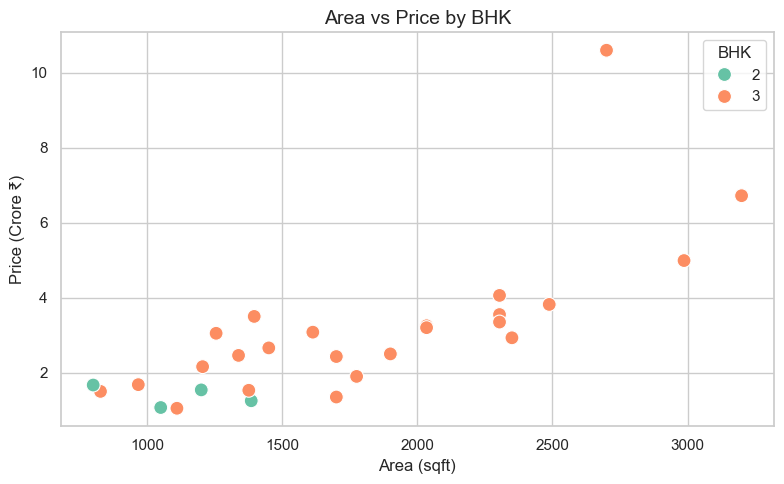

In [46]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Area_sqft', y='Price_Cr', hue='BHK', palette='Set2', s=100)

plt.title('Area vs Price by BHK', fontsize=14)
plt.xlabel('Area (sqft)')
plt.ylabel('Price (Crore ₹)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Box Plot

C:\Users\Nishs\AppData\Local\Temp\ipykernel_12112\3927106453.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='BHK', y='Price_per_sqft', palette='coolwarm')


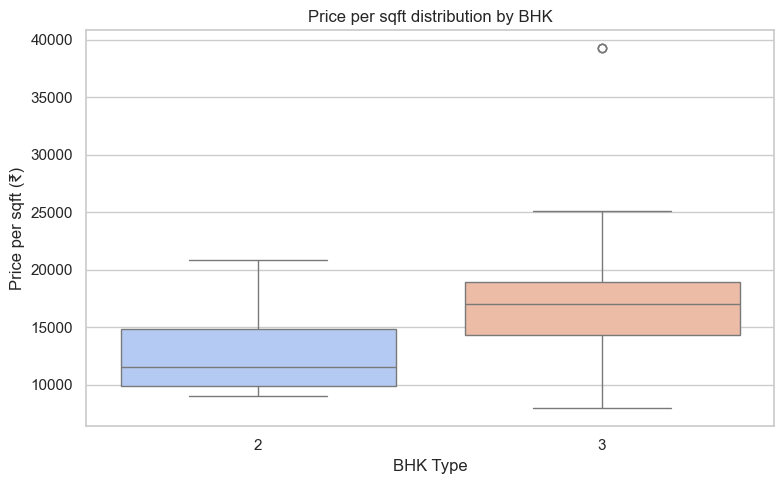

In [47]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='BHK', y='Price_per_sqft', palette='coolwarm')

plt.title('Price per sqft distribution by BHK')
plt.ylabel('Price per sqft (₹)')
plt.xlabel('BHK Type')
plt.tight_layout()
plt.show()


# Heatmap

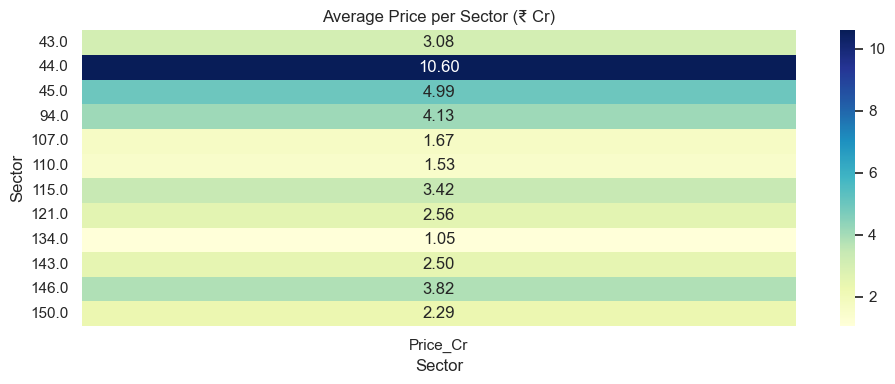

In [48]:
heat_df = df.dropna(subset=['Sector']) \
            .groupby('Sector')[['Price_Cr', 'Price_per_sqft']].mean().reset_index()

plt.figure(figsize=(10, 4))
sns.heatmap(heat_df.pivot_table(values='Price_Cr', index='Sector'),
            annot=True, fmt=".2f", cmap='YlGnBu')

plt.title('Average Price per Sector (₹ Cr)')
plt.xlabel('Sector')
plt.tight_layout()
plt.show()


# Correlation Analysis

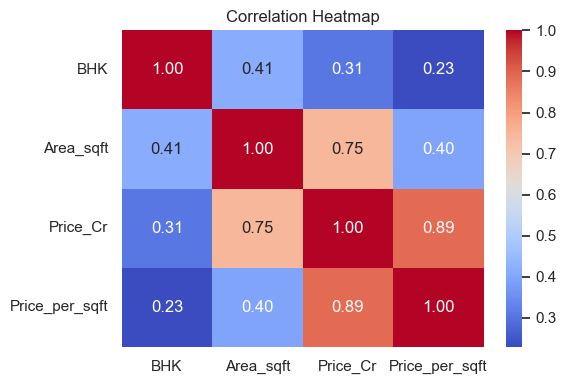

In [49]:
correlation = df[['BHK', 'Area_sqft', 'Price_Cr', 'Price_per_sqft']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


In [50]:
print(df.describe())

        Price_Cr    Area_sqft  Price_per_sqft        BHK      Sector
count  30.000000    30.000000       30.000000  30.000000   24.000000
mean    3.468333  1805.066667    18027.401333   2.866667  106.041667
std     2.712358   670.887880     8329.783361   0.345746   36.178878
min     1.050000   800.000000     7941.180000   2.000000   43.000000
25%     1.672500  1275.750000    12914.470000   3.000000   94.000000
50%     2.795000  1700.000000    16342.045000   3.000000  115.000000
75%     3.537500  2304.000000    18917.550000   3.000000  124.250000
max    10.600000  3200.000000    39259.260000   3.000000  150.000000


# Filtering data for further Analysis

In [51]:
df_custom = df[
    (df['BHK'] == 3) &
    (df['Sector'] == 150.0) &
    (df['Area_sqft'] < 2000)
]

In [52]:
# Check filtered data
print(df_custom[['BHK', 'Sector', 'Area_sqft', 'Price_Cr', 'Price_per_sqft']])

# Average Price per sqft
print("Avg ₹/sqft:", df_custom['Price_per_sqft'].mean())

# Max and Min Price
print("Max ₹:", df_custom['Price_Cr'].max())
print("Min ₹:", df_custom['Price_Cr'].min())

    BHK  Sector  Area_sqft  Price_Cr  Price_per_sqft
2     3   150.0       1700      2.43        14294.12
13    3   150.0        827      1.50        18137.85
Avg ₹/sqft: 16215.985
Max ₹: 2.43
Min ₹: 1.5


# Expensive Properties

In [53]:
costliest_props = df.sort_values(by="Price_per_sqft", ascending=False).head(5)
print(costliest_props[['Title', 'Price_Cr', 'Area_sqft', 'Price_per_sqft', 'BHK', 'Sector']])


                                                Title  Price_Cr  Area_sqft  \
11  3 BHK Flat for Sale in Sector 44, Dadri Road, ...     10.60       2700   
9   3 BHK Flat for Sale in Sector 44, Dadri Road, ...     10.60       2700   
12  3 BHK Flat for Sale in Sector 44, Dadri Road, ...     10.60       2700   
27           3 BHK Flat for Sale in Sector 115, Noida      3.50       1396   
29           3 BHK Flat for Sale in Sector 115, Noida      3.05       1255   

    Price_per_sqft  BHK  Sector  
11        39259.26    3    44.0  
9         39259.26    3    44.0  
12        39259.26    3    44.0  
27        25071.63    3   115.0  
29        24302.79    3   115.0  


# Cheapest Properties

In [54]:
cheapest_props = df.sort_values(by="Price_per_sqft").head(5)
print(cheapest_props[['Title', 'Price_Cr', 'Area_sqft', 'Price_per_sqft', 'BHK', 'Sector']])

                                                Title  Price_Cr  Area_sqft  \
23      3 BHK Flat for Sale in Noida Extension, Noida      1.35       1700   
1       2 BHK Flat for Sale in Noida Extension, Noida      1.25       1385   
26  3 BHK Flat for Sale in Sector 134, Noida Expre...      1.05       1110   
6       2 BHK Flat for Sale in Noida Extension, Noida      1.07       1050   
18      3 BHK Flat for Sale in Noida Extension, Noida      1.90       1775   

    Price_per_sqft  BHK  Sector  
23         7941.18    3     NaN  
1          9025.27    2     NaN  
26         9459.46    3   134.0  
6         10190.48    2     NaN  
18        10704.23    3     NaN  


# Value for Money Flats

In [55]:
value_for_money = df.sort_values(by=["Price_per_sqft", "Area_sqft"], ascending=[True, False]).head(5)
print(value_for_money[['Title', 'Price_Cr', 'Area_sqft', 'Price_per_sqft', 'BHK', 'Sector']])

                                                Title  Price_Cr  Area_sqft  \
23      3 BHK Flat for Sale in Noida Extension, Noida      1.35       1700   
1       2 BHK Flat for Sale in Noida Extension, Noida      1.25       1385   
26  3 BHK Flat for Sale in Sector 134, Noida Expre...      1.05       1110   
6       2 BHK Flat for Sale in Noida Extension, Noida      1.07       1050   
18      3 BHK Flat for Sale in Noida Extension, Noida      1.90       1775   

    Price_per_sqft  BHK  Sector  
23         7941.18    3     NaN  
1          9025.27    2     NaN  
26         9459.46    3   134.0  
6         10190.48    2     NaN  
18        10704.23    3     NaN  


# Top 5 Value for money Flats in Noida

C:\Users\Nishs\AppData\Local\Temp\ipykernel_12112\2723098614.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=value_for_money, x="Price_per_sqft", y="Title", palette="viridis")


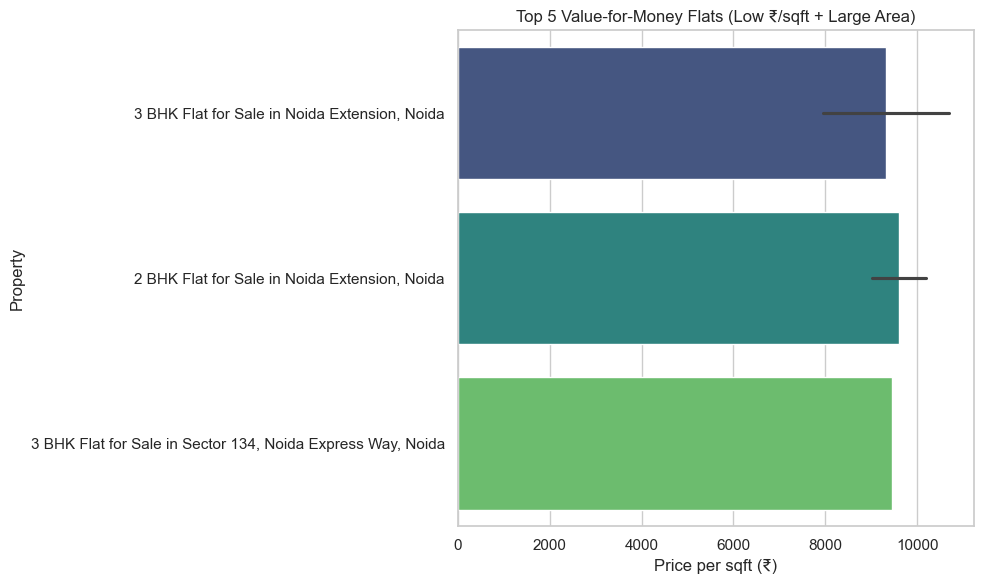

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=value_for_money, x="Price_per_sqft", y="Title", palette="viridis")
plt.title("Top 5 Value-for-Money Flats (Low ₹/sqft + Large Area)")
plt.xlabel("Price per sqft (₹)")
plt.ylabel("Property")
plt.tight_layout()
plt.show()

## 📌 Conclusion

- This project demonstrates an end-to-end real estate data analysis pipeline, starting from web scraping MagicBricks listings to cleaning and analyzing data for key insights.
- We extracted relevant fields such as price, area, price per sqft, number of BHKs, and location sectors using BeautifulSoup and regular expressions.
- After cleaning and transforming the data using Pandas, we conducted insightful analyses like:
  - Top 5 cheapest & costliest properties (₹ per sqft)
  - Best value-for-money flats (low price/sqft with large area)
  - BHK-wise and Sector-wise trends
- The final dataset is clean, structured, and export-ready for reporting or visualization tools.
- This project strengthens hands-on experience in web scraping, data cleaning, and exploratory data analysis (EDA) — skills highly relevant for Data Analyst and Business Analyst roles.